In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data = pd.read_csv("C:\\Users\\Dell\\Desktop\\Omdena\\ml_assignment\\machine-learning-introduction-bnusuwal\\data\BostonHousing.csv")

<>:1: SyntaxWarning: invalid escape sequence '\B'
<>:1: SyntaxWarning: invalid escape sequence '\B'
C:\Users\Dell\AppData\Local\Temp\ipykernel_25332\66876074.py:1: SyntaxWarning: invalid escape sequence '\B'
  data = pd.read_csv("C:\\Users\\Dell\\Desktop\\Omdena\\ml_assignment\\machine-learning-introduction-bnusuwal\\data\BostonHousing.csv")


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Features and target
X = data.drop('medv', axis=1)  
y = data['medv']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train (fit) the model
model.fit(X_train, y_train)


predictions = model.predict(X_test)


In [5]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 24.291119474973613
R-squared (R²): 0.6687594935356307


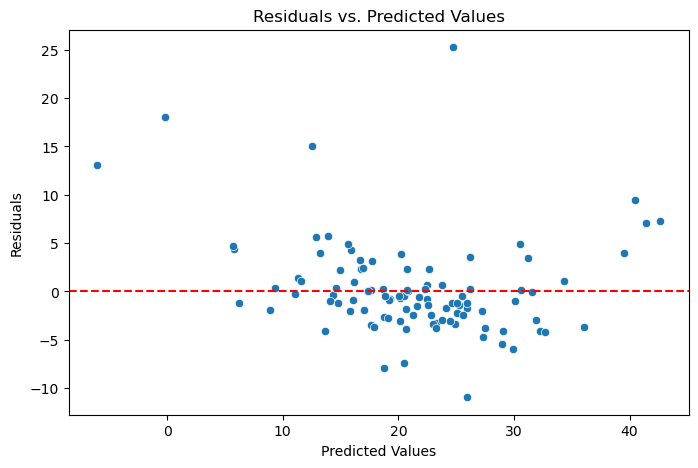

In [6]:
# Calculate residuals
residuals = y_test - y_pred

# Scatter plot of residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()


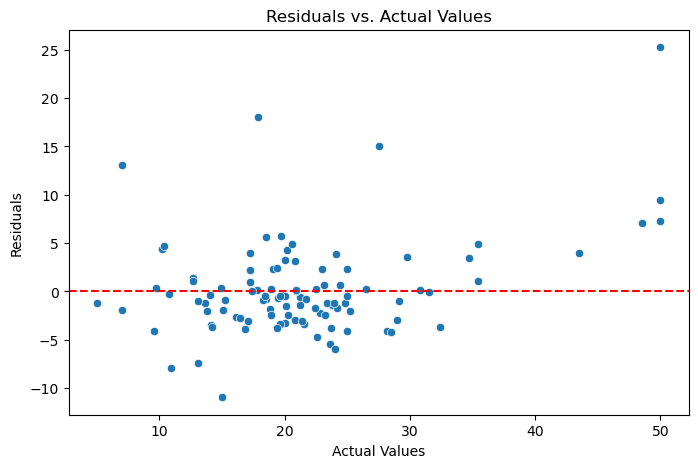

In [7]:
# Residuals vs Actual Values plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Actual Values")
plt.show()


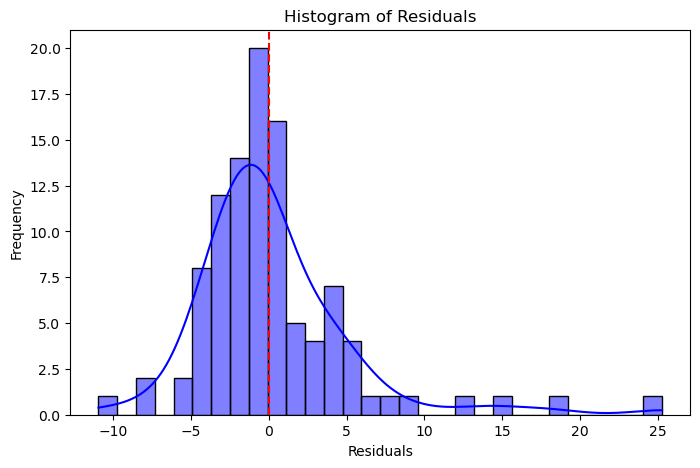

In [8]:

# Histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True, color='blue')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

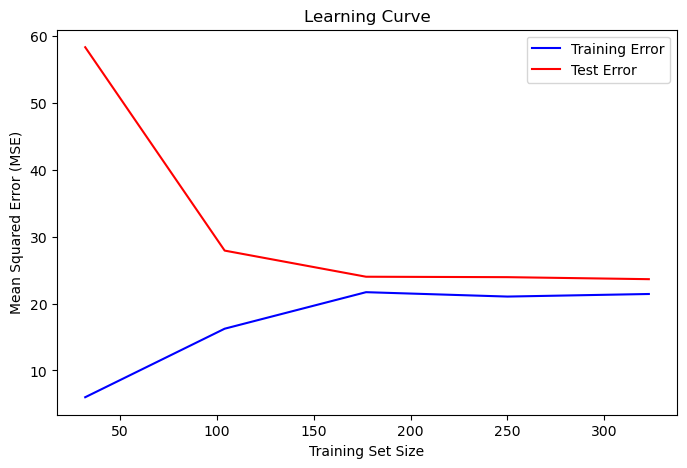

In [9]:
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Plot learning curve
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, -train_scores.mean(axis=1), label="Training Error", color='blue')
plt.plot(train_sizes, -test_scores.mean(axis=1), label="Test Error", color='red')
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Learning Curve")
plt.legend()
plt.show()